In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import numpy as np
import os
def plot_figure(file_path, x_axis_col, y_axis_col,x_label,y_label, sub_plt,title):
    data = pd.read_csv(file_path)
    x_data = data[x_axis_col].to_numpy()
    y_data = data[y_axis_col].to_numpy()
    if(y_axis_col=="succs"):
        print(y_label+ " mean",np.mean(y_data))
    # data.plot(kind='line',x=x_axis_col,y=y_axis_col,ax=plt.gca())
    sub_plt.set_xlabel(x_label)
    sub_plt.set_ylabel(y_label)
    sub_plt.set_title(title)
    sub_plt.xaxis.set_major_locator(MaxNLocator(integer=True))
    # sub_plt.set_xticks()
    # sub_plt.set_yticks(np.arange(0,100,10))
    sub_plt.plot(x_data,y_data)

In [8]:
def get_dir_session_files(dir_path):
    files = os.listdir(dir_path)
    inv_file = None
    timing_file = None
    selected_details_file = None
    for file in files:
        if file.startswith("invocation_"):
            inv_file = os.path.join(dir_path, file)
        if file.startswith("timing_"):
            timing_file = os.path.join(dir_path, file)
        if file.startswith("clients"):
            selected_details_file = os.path.join(dir_path, file)
    return inv_file, timing_file,selected_details_file

def get_variance(clients_log_path):
    data = pd.read_csv(clients_log_path)
    grouped_data= data.groupby(['client_id']).size()
    return max(grouped_data),min(grouped_data)
        
def plot_dataset_compare_3(path_normals,path_enhanced):

    x_labels = [("round_id", "round number"),("round_id", "round number")]
    y_labels = [("succs", "EUR"),("global_test_accuracy","accuracy")]
    titles = ["Effective Update Ratio", "Test Accuracy"]
    acc, acc_plts = plt.subplots(1, len(path_normals),figsize=(14,4))
    eur, eur_plts = plt.subplots(1,len(path_normals),figsize=(14,4))
    acc.tight_layout(h_pad=6)
    eur.tight_layout(h_pad=6)
    for idx, (normal,enhanced) in enumerate(zip(path_normals,path_enhanced)):
        
        inv_path_normal,timing_path_normal,selected_normal = get_dir_session_files(normal)
        
        inv_path_enhanced,timing_path_enhanced, selected_enhanced  = get_dir_session_files(enhanced)
        
        # selected_normal = pd.read_csv(selected_normal)
        # selected_enhanced = pd.read_csv(selected_enhanced)
        # selected_data_norm= selected_normal.groupby(['client_id']).size()
        # selected_data_e= selected_enhanced.groupby(['client_id']).size()
        max_norm, min_norm = get_variance(selected_normal)
        max_en, min_en = get_variance(selected_enhanced)
        print(f'norm variance: {max_norm-min_norm} for max of {max_norm} and min of {min_norm}')
        print(f'enhanced variance: {max_en-min_en} for max of {max_en} and min of {min_en}')
        plot_figure(inv_path_normal,x_labels[0][0],y_labels[0][0],x_labels[0][1],y_labels[0][1],eur_plts[idx],titles[0])
        plot_figure(timing_path_normal,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],acc_plts[idx],titles[1])
        
        plot_figure(inv_path_enhanced,x_labels[0][0],y_labels[0][0],x_labels[0][1],y_labels[0][1],eur_plts[idx],titles[0])
        plot_figure(timing_path_enhanced,x_labels[1][0],y_labels[1][0],x_labels[1][1],y_labels[1][1],acc_plts[idx],titles[1])
        

norm variance: 32 for max of 42 and min of 10
enhanced variance: 30 for max of 39 and min of 9
EUR mean 89.56666666666666
EUR mean 96.0
norm variance: 26 for max of 33 and min of 7
enhanced variance: 31 for max of 36 and min of 5
EUR mean 79.8
EUR mean 91.08
norm variance: 25 for max of 32 and min of 7
enhanced variance: 27 for max of 35 and min of 8
EUR mean 69.4
EUR mean 86.04


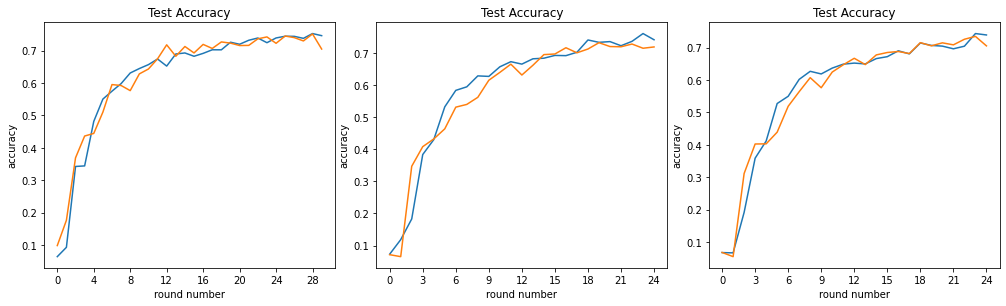

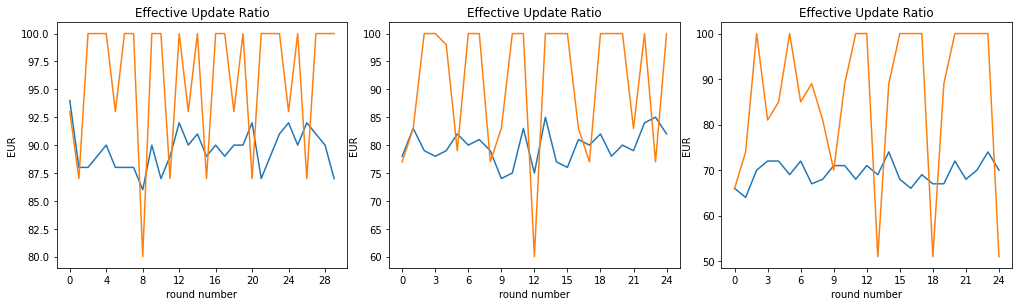

In [9]:
# feminist controlled
base_path = "../../out/controlled"

path_normals = [f'{base_path}/femnist-0.1',f'{base_path}/femnist-0.2',f'{base_path}/femnist-0.3']
path_enhanced = [f'{base_path}/femnist-enhanced-0.1',f'{base_path}/femnist-enhanced-0.2',f'{base_path}/femnist-enhanced-0.3']


plot_dataset_compare_3(path_normals,path_enhanced)


norm variance: 23 for max of 28 and min of 5
enhanced variance: 21 for max of 25 and min of 4
EUR mean 89.84
EUR mean 95.68
norm variance: 20 for max of 23 and min of 3
enhanced variance: 25 for max of 30 and min of 5
EUR mean 78.5
EUR mean 88.2
norm variance: 22 for max of 24 and min of 2
enhanced variance: 19 for max of 21 and min of 2
EUR mean 69.45
EUR mean 83.8


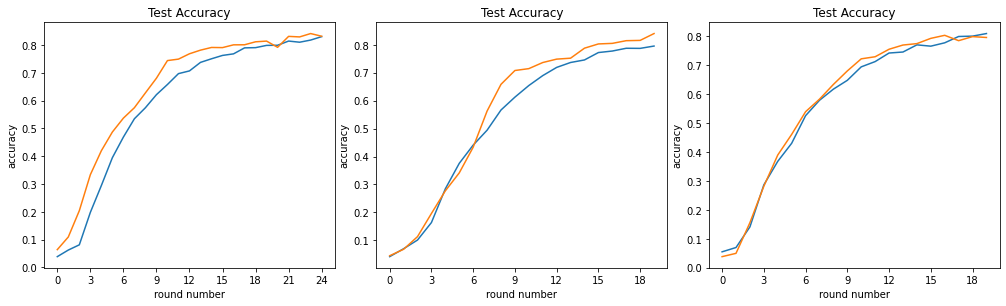

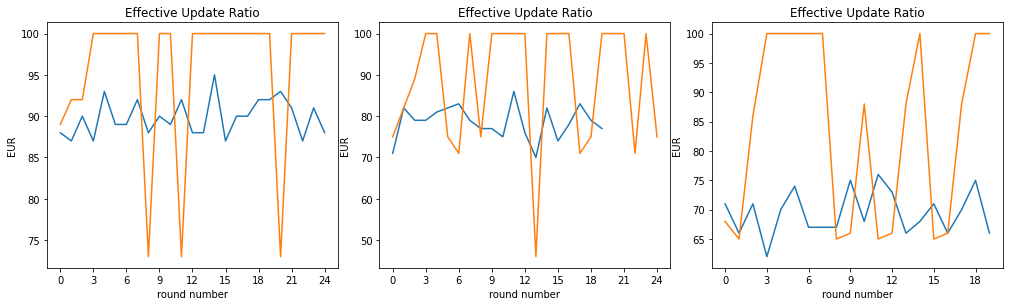

In [10]:
# speech controlled

base_path = "../../out/controlled"

path_normals = [f'{base_path}/speech-d-0.1',f'{base_path}/speech-d-0.2',f'{base_path}/speech-d-0.3-seed_10']
path_enhanced = [f'{base_path}/speech-enhanced-d1-0.1',f'{base_path}/speech-enhanced-d1-0.2',f'{base_path}/speech-enhanced-d-0.3-seed_10']

plot_dataset_compare_3(path_normals,path_enhanced)

norm variance: 28 for max of 52 and min of 24
enhanced variance: 23 for max of 53 and min of 30
EUR mean 100.0
EUR mean 100.0
norm variance: 17 for max of 26 and min of 9
enhanced variance: 13 for max of 25 and min of 12
EUR mean 120.0
EUR mean 120.0
norm variance: 17 for max of 19 and min of 2
enhanced variance: 24 for max of 26 and min of 2
EUR mean 25.0
EUR mean 25.0


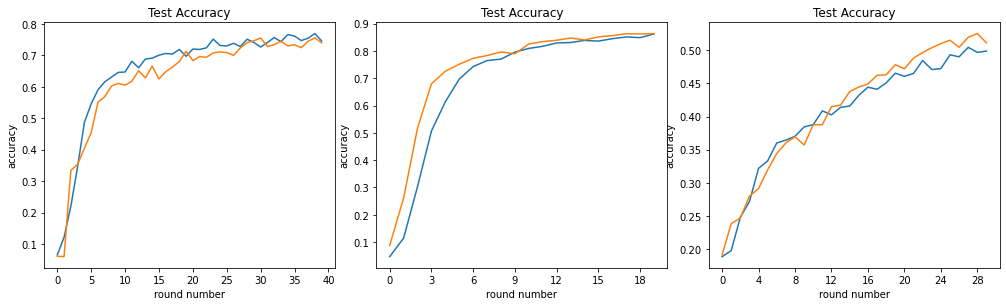

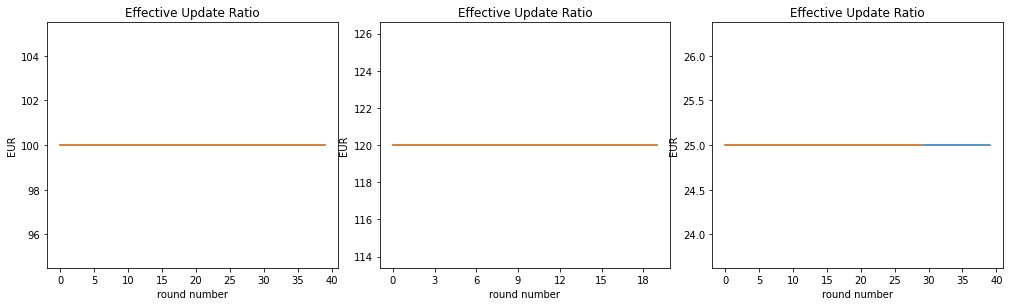

In [11]:
# ideal
base_path = "../../out/ideal"

path_normals = [f'{base_path}/femnist',f'{base_path}/speech',f'{base_path}/shakespeare']
path_enhanced = [f'{base_path}/femnist-enhanced',f'{base_path}/speech-enhanced',f'{base_path}/shakespeare-enhanced']


plot_dataset_compare_3(path_normals,path_enhanced)

In [ ]:
# higher variance when having stragglers
#lower when not
# when you include more clients in a round the accuracy tend to go down a bit because we are averaging
# after a while it goes backup